In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [35]:
df=pd.read_csv('final_df.csv')

In [36]:
df.head()

,Unnamed: 0,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY,Price_per_sqft(lac)
0,0,Owner,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0,Bangalore,0.04230
1,1,Dealer,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0,Other,0.04000
2,2,Owner,0,0,2,933.159722,1,1,12.778033,77.632191,43.0,Bangalore,0.04608
3,3,Owner,0,1,2,929.921143,1,1,28.642300,77.344500,62.5,Ghaziabad,0.06721
4,4,Dealer,1,0,2,999.009247,0,1,22.592200,88.484911,60.5,Kolkata,0.06056


In [37]:
df['Price_per_sqft']=np.floor(round(df['Price_per_sqft(lac)']*100000,2))

In [38]:
df.head()

,Unnamed: 0,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY,Price_per_sqft(lac),Price_per_sqft
0,0,Owner,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0,Bangalore,0.04230,4230.0
1,1,Dealer,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0,Other,0.04000,4000.0
2,2,Owner,0,0,2,933.159722,1,1,12.778033,77.632191,43.0,Bangalore,0.04608,4608.0
3,3,Owner,0,1,2,929.921143,1,1,28.642300,77.344500,62.5,Ghaziabad,0.06721,6721.0
4,4,Dealer,1,0,2,999.009247,0,1,22.592200,88.484911,60.5,Kolkata,0.06056,6056.0


In [39]:
df=df.drop(['Unnamed: 0','LONGITUDE','LATITUDE','Price_per_sqft(lac)'],1)

In [40]:
X=df.drop('TARGET(PRICE_IN_LACS)',1)
y=df[['TARGET(PRICE_IN_LACS)']]

In [41]:
X.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,CITY,Price_per_sqft
0,Owner,0,0,2,1300.236407,1,1,Bangalore,4230.0
1,Dealer,0,0,2,1275.000000,1,1,Other,4000.0
2,Owner,0,0,2,933.159722,1,1,Bangalore,4608.0
3,Owner,0,1,2,929.921143,1,1,Ghaziabad,6721.0
4,Dealer,1,0,2,999.009247,0,1,Kolkata,6056.0


In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28524 entries, 0 to 28523
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   POSTED_BY           28524 non-null  object 
 1   UNDER_CONSTRUCTION  28524 non-null  int64  
 2   RERA                28524 non-null  int64  
 3   BHK_NO.             28524 non-null  object 
 4   SQUARE_FT           28524 non-null  float64
 5   READY_TO_MOVE       28524 non-null  int64  
 6   RESALE              28524 non-null  int64  
 7   CITY                28524 non-null  object 
 8   Price_per_sqft      28524 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 2.0+ MB


In [48]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28524 entries, 0 to 28523
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TARGET(PRICE_IN_LACS)  28524 non-null  float64
dtypes: float64(1)
memory usage: 223.0 KB


In [43]:
# crating dummies

In [45]:
X_=pd.get_dummies(X)

In [46]:
X_.head()

,UNDER_CONSTRUCTION,RERA,SQUARE_FT,READY_TO_MOVE,RESALE,Price_per_sqft,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner,BHK_NO._1,...,CITY_Chennai,CITY_Faridabad,CITY_Ghaziabad,CITY_Jaipur,CITY_Kolkata,CITY_Lalitpur,CITY_Mumbai,CITY_Noida,CITY_Other,CITY_Pune
0,0,0,1300.236407,1,1,4230.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1275.000000,1,1,4000.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,933.159722,1,1,4608.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,929.921143,1,1,6721.0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,999.009247,0,1,6056.0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [50]:
X_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28524 entries, 0 to 28523
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   UNDER_CONSTRUCTION  28524 non-null  int64  
 1   RERA                28524 non-null  int64  
 2   SQUARE_FT           28524 non-null  float64
 3   READY_TO_MOVE       28524 non-null  int64  
 4   RESALE              28524 non-null  int64  
 5   Price_per_sqft      28524 non-null  float64
 6   POSTED_BY_Builder   28524 non-null  uint8  
 7   POSTED_BY_Dealer    28524 non-null  uint8  
 8   POSTED_BY_Owner     28524 non-null  uint8  
 9   BHK_NO._1           28524 non-null  uint8  
 10  BHK_NO._2           28524 non-null  uint8  
 11  BHK_NO._3           28524 non-null  uint8  
 12  BHK_NO._4           28524 non-null  uint8  
 13  BHK_NO._4+          28524 non-null  uint8  
 14  CITY_Bangalore      28524 non-null  uint8  
 15  CITY_Chandigarh     28524 non-null  uint8  
 16  CITY

dropping some columns manually because in dummificTION WE need n-1 columns from feature where n is number of categorical value present

In [53]:
# dropping POSTED_BY_Dealer,  BHK_NO._4+ , CITY_Other
X_=X_.drop(['POSTED_BY_Dealer','BHK_NO._4+' , 'CITY_Other'],1)

In [54]:
X_.head()

,UNDER_CONSTRUCTION,RERA,SQUARE_FT,READY_TO_MOVE,RESALE,Price_per_sqft,POSTED_BY_Builder,POSTED_BY_Owner,BHK_NO._1,BHK_NO._2,...,CITY_Chandigarh,CITY_Chennai,CITY_Faridabad,CITY_Ghaziabad,CITY_Jaipur,CITY_Kolkata,CITY_Lalitpur,CITY_Mumbai,CITY_Noida,CITY_Pune
0,0,0,1300.236407,1,1,4230.0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1275.000000,1,1,4000.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,933.159722,1,1,4608.0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,929.921143,1,1,6721.0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
4,1,0,999.009247,0,1,6056.0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [67]:
X_train,X_test,y_train,y_test=train_test_split(X_,y,train_size=.8,random_state=0)

In [68]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(22819, 23)
(5705, 23)
(22819, 1)
(5705, 1)


In [69]:
# creating pipeline of XGboost regressor

In [70]:
pipe = Pipeline((
("pt", PowerTransformer()),
("sc",StandardScaler()),
("xgb", XGBRegressor(n_estimators=100)),
))

In [71]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('pt', PowerTransformer()), ('sc', StandardScaler()),
                ('xgb',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=0, num_parallel_tree=1, random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=1, tree_method='exact',
                              validate_parameters=1, verbosity=None))])

In [75]:
y_train_pred=pipe.predict(X_train)

In [77]:
y_test_pred=pipe.predict(X_test)

In [78]:
print("R2 score of training {}, R2 score of test dataset {}".format(r2_score(y_train,y_train_pred),\
                                                                    r2_score(y_test,y_test_pred)))

R2 score of training 0.9996454774788469, R2 score of test dataset 0.9988520348051781


In [80]:
# We r getting almost 99 % score in both test and train data

In [82]:
from sklearn.model_selection import cross_val_score
scoresxgb = cross_val_score(pipe,X_train,y_train,cv=10,scoring='r2')
print(scoresxgb)

[0.99888335 0.99844382 0.99846585 0.99814403 0.99858206 0.99890073
 0.99869055 0.99764308 0.99894441 0.99892793]


In [84]:
print("Average Accuracy of my model")
print(np.mean(scoresxgb))
print("SD of accuracy of the model")
print(np.std(scoresxgb,ddof=1))

Average Accuracy of my model
0.9985625815711868
SD of accuracy of the model
0.0004159845855104228


In [85]:
#Estimate Confidence Interval of R2
import scipy.stats as stats
n=10
xbar = np.mean(scoresxgb)
s = np.std(scoresxgb)
se = s/np.sqrt(n)
stats.t.interval(0.95,df=n-1,loc=xbar,scale=se)

(0.9982802748182762, 0.9988448883240975)

In [86]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt




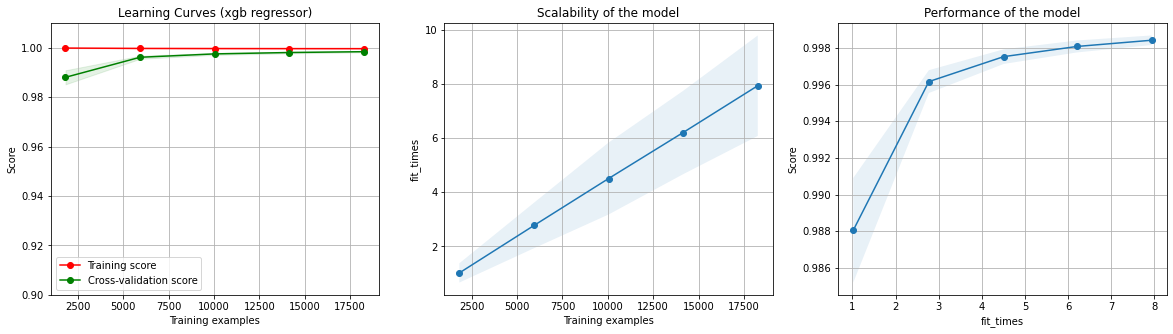

In [106]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


# fig, axes = plt.subplots(2,2, figsize=(10, 15))

# X, y = load_digits(return_X_y=True)

title = "Learning Curves (xgb regressor)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

plot_learning_curve(pipe, title, X_train, y_train, ylim=(0.9, 1.01),
                    cv=cv, n_jobs=4)
plt.show()

In [94]:
from sklearn.model_selection import validation_curve

In [109]:
train_scores, valid_scores = validation_curve(pipe, X_train, y_train,'xgb__n_estimators',[20,50,800,100,150,200],cv=cv)

E:\python\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=xgb__n_estimators, param_range=[20, 50, 800, 100, 150, 200] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [140]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)

In [144]:
param_range=[20,50,800,100,150,200]

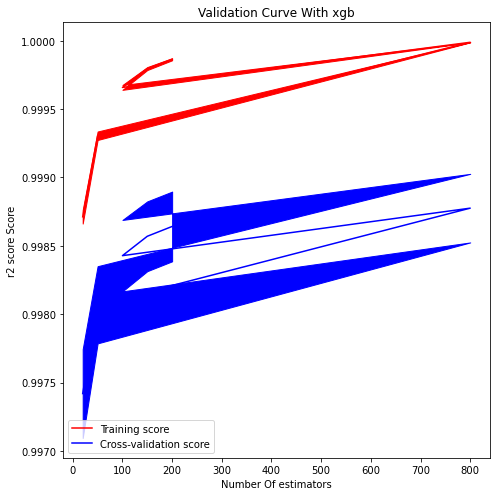

In [151]:
plt.subplots(1, figsize=(7,7))
plt.plot(param_range, train_mean, label="Training score", color="r")
plt.plot(param_range, test_mean, label="Cross-validation score", color="b")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="r")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="b")
 
plt.title("Validation Curve With xgb")
plt.xlabel("Number Of estimators")
plt.ylabel("r2 score Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

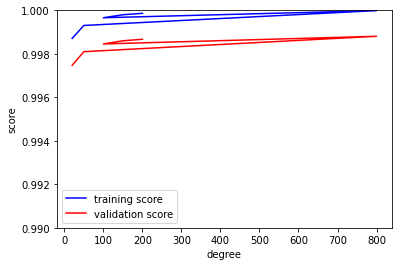

In [159]:
plt.plot(param_range, np.median(train_scores, 1), color='blue', label='training score')
plt.plot(param_range, np.median(valid_scores, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(.99, 1)
plt.xlabel('degree')
plt.ylabel('score');